<div style="text-align: center; padding: 20px; font-family: Vazir;">
<h1 align="center" style="font-size: 28px; color:rgb(64, 244, 202); width: 100%;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>تمرین چهارم Computer Vission<br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1>

<div dir='rtl' style="border: 2px dashed rgb(90, 255, 184); border-radius: 8px; padding: 20px; margin: 20px auto; max-width: 500px; text-align: right;">
<p dir='rtl' style="color: rgb(64, 244, 202); font-size: 18px; margin-bottom: 15px;"> مشخصات دانشجویان:</p>
<p dir='rtl' style="color: #fffdfdff; margin: 5px;">نام و نام خانوادگی: البرز محمودیان</p>
<p dir='rtl' style="color: #ffffffff; margin: 5px;">شماره دانشجویی: 810101514</p>
<br>
<p dir='rtl' style="color: #fffdfdff; margin: 5px;">نام و نام خانوادگی: کسری کاشانی</p>
<p dir='rtl' style="color: #ffffffff; margin: 5px;">شماره دانشجویی: 810101490</p>
</div>
</div>



In [1]:
# !pip install torch torchvision torchaudio

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_ds = datasets.FashionMNIST(root='data', train=True, download=False, transform=transform)
test_ds  = datasets.FashionMNIST(root='data', train=False, download=False, transform=transform)


In [4]:
batch_size = 64

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [5]:
images, labels = next(iter(train_loader))
print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

Shape of images batch: torch.Size([64, 1, 28, 28])
Shape of labels batch: torch.Size([64])


<div dir="rtl" align="right">
هر batch از تصاویر دارای ابعاد `(batch_size, 1, 28, 28)` است.
عدد ۱ نشان‌دهنده تک‌کاناله (grayscale) بودن تصاویر است.

از آن‌جایی که لایه‌های Fully Connected فقط ورودی یک‌بعدی می‌پذیرند،
باید هر تصویر 28×28 به یک بردار 784 تایی تبدیل شود.
این کار توسط عملیات Flatten انجام می‌شود.

</div>


In [6]:
class_names = train_ds.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

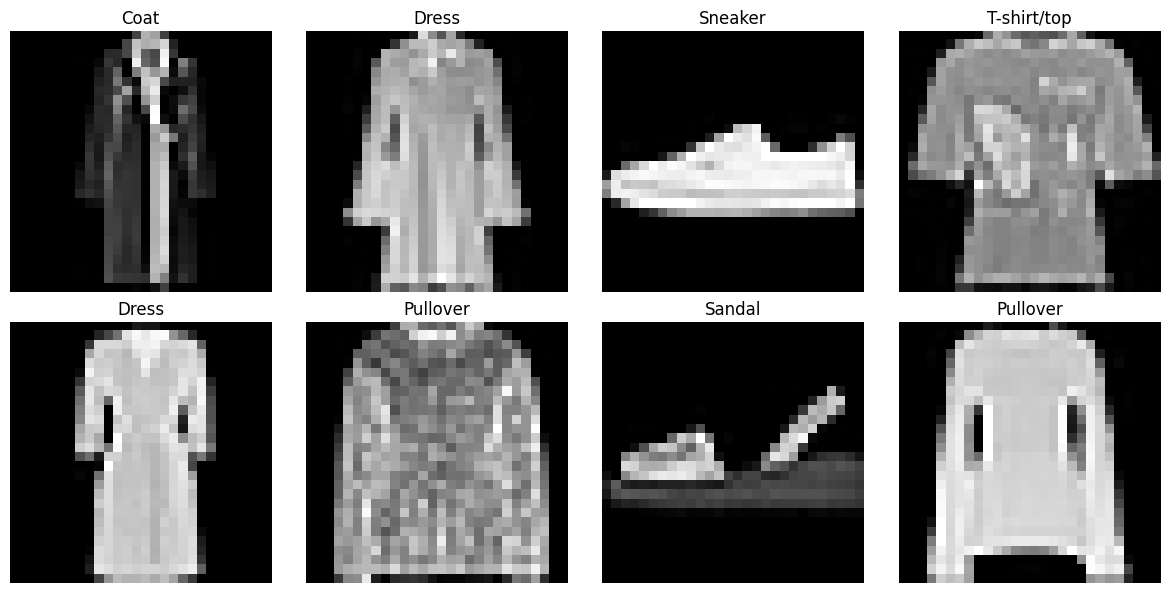

In [7]:
# Number of samples to display
num_samples = 8

plt.figure(figsize=(12,6))
for i in range(num_samples):
    img = images[i].squeeze() # (1,28,28) -> (28,28)

    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray')
    
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout() 
plt.show()

In [8]:
class FashionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
model = FashionNN()
print(model)

FashionNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [10]:
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal number of parameters: {total_params}")


Total number of parameters: 235146


<div dir="rtl" align="right">
این مدل یک شبکه عصبی چندلایه (MLP) برای طبقه‌بندی تصاویر 28×28 از دیتاست FashionMNIST است.  

- **Flatten:** مرحله اول تصویر 28×28 را به یک بردار 784 بعدی تبدیل می‌کند تا بتوان آن را وارد لایه‌های Fully Connected کرد.  
- **FC1 (784 → 256):** اولین لایه مخفی با 256 نورون و تابع فعال‌سازی ReLU. این لایه ویژگی‌های اولیه تصویر را استخراج می‌کند.  
- **FC2 (256 → 128):** دومین لایه مخفی با 128 نورون و ReLU که ویژگی‌ها را فشرده‌تر و مفیدتر می‌کند.  
- **FC3 (128 → 10):** لایه خروجی با 10 نورون، هر نورون برای یکی از کلاس‌های لباس است. Softmax نیاز نیست چون CrossEntropyLoss خودش اعمال می‌کند.  

تعداد پارامترها:  
- FC1: \(784 * 256 + 256 = 200,960\)  
- FC2: \(256 * 128 + 128 = 32,896\)  
- FC3: \(128 * 10 + 10 = 1,290\)  
- کل پارامترها: 235,146  

هر لایه نقش فشرده‌سازی و استخراج ویژگی را دارد و تعداد پارامترها نشان‌دهنده ظرفیت مدل برای یادگیری الگوهای تصاویر است.


</div>

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

<div dir="rtl" align="right">
تابع CrossEntropyLoss برای طبقه‌بندی چندکلاسه مناسب است
زیرا به‌صورت هم‌زمان عملیات Softmax و محاسبه خطا را انجام می‌دهد
و خروجی مدل را مستقیماً با برچسب‌های صحیح مقایسه می‌کند.
</div>

In [12]:
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
    
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

Epoch [1/10] - Loss: 0.4936 - Accuracy: 0.8203
Epoch [2/10] - Loss: 0.3669 - Accuracy: 0.8641
Epoch [3/10] - Loss: 0.3304 - Accuracy: 0.8777
Epoch [4/10] - Loss: 0.3047 - Accuracy: 0.8868
Epoch [5/10] - Loss: 0.2857 - Accuracy: 0.8931
Epoch [6/10] - Loss: 0.2690 - Accuracy: 0.8999
Epoch [7/10] - Loss: 0.2553 - Accuracy: 0.9047
Epoch [8/10] - Loss: 0.2424 - Accuracy: 0.9088
Epoch [9/10] - Loss: 0.2323 - Accuracy: 0.9116
Epoch [10/10] - Loss: 0.2228 - Accuracy: 0.9157


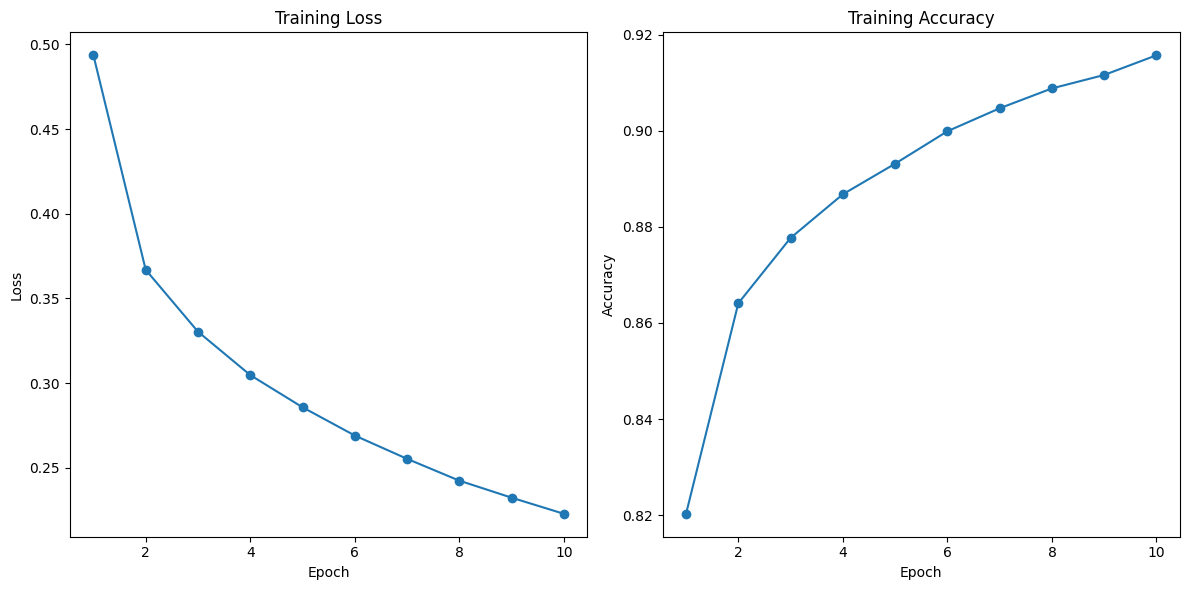

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [14]:
model.eval()
all_labels = []
all_preds = []
all_images = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_images.extend(images.cpu())

test_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8768


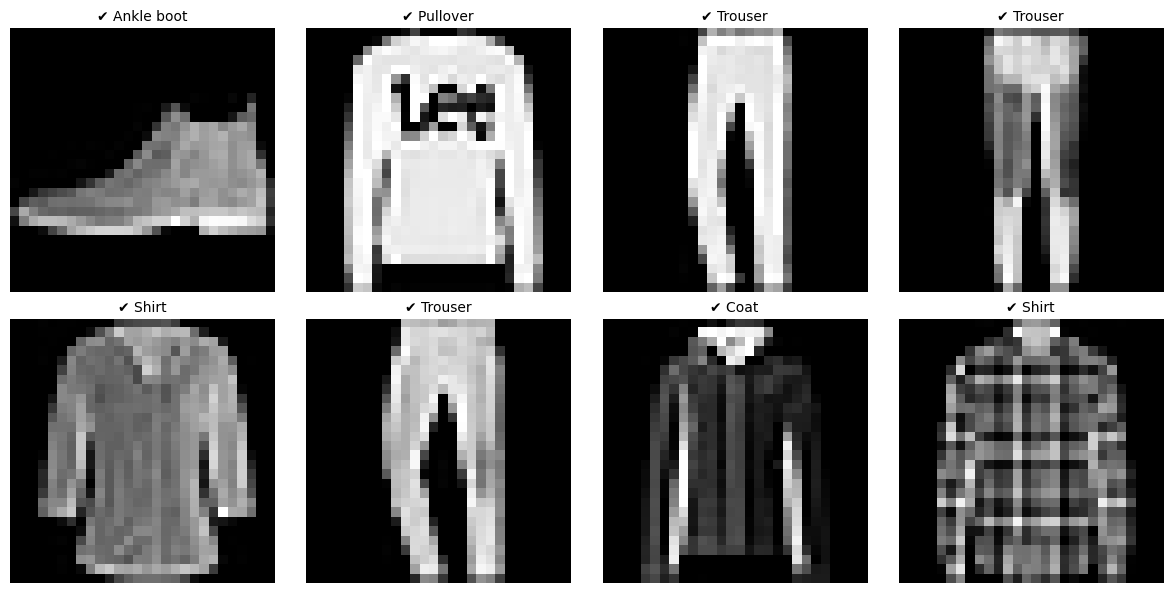

In [15]:
# Number of samples to display
num_samples = 8

plt.figure(figsize=(12,6))
for i in range(num_samples):
    img = all_images[i].squeeze()
    true_lbl = all_labels[i]
    pred_lbl = all_preds[i]
    
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray')
    
    if pred_lbl == true_lbl:
        title = f"✔ {class_names[true_lbl]}"
    else:
        title = f"✖ P:{class_names[pred_lbl]}\nT:{class_names[true_lbl]}"
    
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
mis_idx = [i for i in range(len(all_labels)) if all_labels[i] != all_preds[i]]
print("Number of misclassified samples:", len(mis_idx))

Number of misclassified samples: 1232


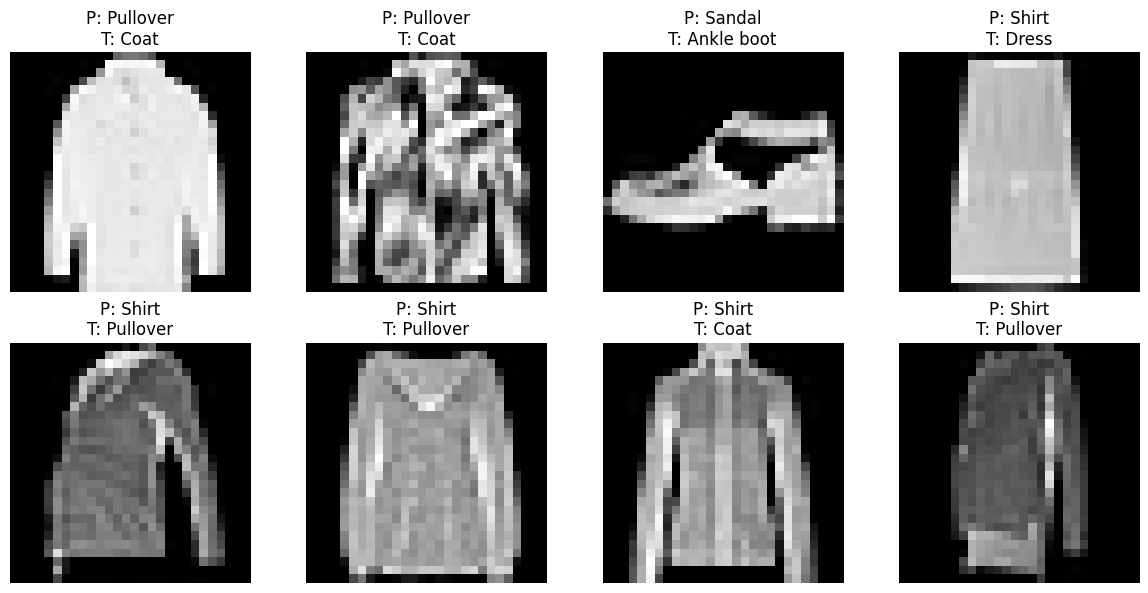

In [17]:
# Number of samples to display
num_samples = 8

plt.figure(figsize=(12,6))
for i in range(num_samples):
    idx = mis_idx[i]
    img = all_images[idx].squeeze()

    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap="gray")
    
    plt.title(
        f"P: {class_names[all_preds[idx]]}\n"
        f"T: {class_names[all_labels[idx]]}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


<div dir="rtl" align="right">
با بررسی نمونه‌های اشتباه مشاهده می‌شود که
بیشترین میزان خطا مربوط به کلاس‌هایی است که از نظر شکل ظاهری و نوع پوشش
شباهت زیادی به یکدیگر دارند. این موضوع کاملاً قابل انتظار است.

برای مثال، لباس‌هایی مانند «Pullover» و «Coat» یا «T-shirt» و «Shirt»
از نظر فرم کلی، طول آستین و الگوی کلی پوشش تفاوت ظریف و گاه مبهمی دارند،
به‌خصوص زمانی که تصاویر به‌صورت خاکستری و با رزولوشن پایین (28×28) ارائه می‌شوند.
در چنین شرایطی، مدل به‌سختی می‌تواند ویژگی‌های متمایزکننده دقیق را استخراج کند.

همچنین در میان کفش‌ها، کلاس‌هایی مانند «Sneaker»، «Ankle Boot» و «Sandal»
به دلیل شباهت در ساختار کلی کفش و زاویه دید تصویر،
بیشتر با یکدیگر اشتباه گرفته شده‌اند.
این مسئله نشان می‌دهد که مدل در تشخیص جزئیات ظریف مانند ارتفاع ساق کفش
یا باز و بسته بودن آن با محدودیت مواجه است.
</div>

In [18]:
from sklearn.metrics import confusion_matrix

y_true = torch.tensor(all_labels)
y_pred = torch.tensor(all_preds)

cm = confusion_matrix(y_true, y_pred)

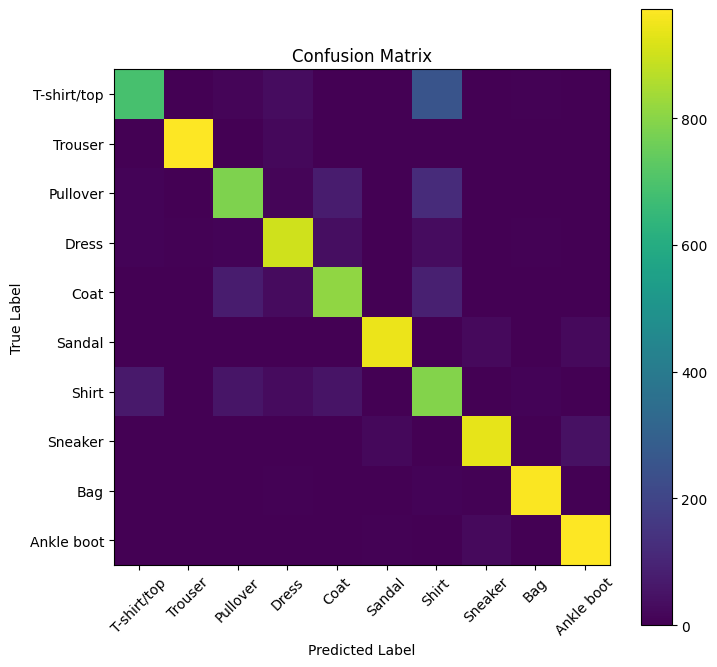

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(cm)
plt.colorbar()

plt.xticks(range(10), class_names, rotation=45)
plt.yticks(range(10), class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

In [20]:
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

max_error_idx = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)

true_cls = class_names[max_error_idx[0]]
pred_cls = class_names[max_error_idx[1]]
count = cm_no_diag[max_error_idx]

true_cls, pred_cls, count

('T-shirt/top', 'Shirt', np.int64(252))

<div dir="rtl" align="right">
با بررسی ماتریس درهم‌ریختگی مشخص می‌شود که بیشترین میزان خطا
مربوط به نمونه‌هایی است که در واقع متعلق به کلاس «{{true_cls}}»
بوده‌اند اما به‌اشتباه به‌عنوان «{{pred_cls}}» پیش‌بینی شده‌اند.

این موضوع نشان می‌دهد که این دو کلاس از نظر ویژگی‌های بصری
شباهت قابل‌توجهی دارند و مدل فعلی که مبتنی بر لایه‌های Fully Connected است،
در تفکیک آن‌ها محدودیت دارد.
</div>

In [21]:
def train_evaluate_fashion_mnist(
    hidden_sizes=[256, 128],
    dropout=0.0,
    batch_norm=False,
    lr=0.001,
    optimizer_type='Adam',
    num_epochs=10,
    batch_size=64,
    show_samples=False
):  
    # 1. Define class names
    class_names = train_ds.classes
    
    # 2. Define the model
    class FashionNN(nn.Module):
        def __init__(self, hidden_sizes, dropout=0.0, batch_norm=False):
            super().__init__()
            self.flatten = nn.Flatten()
            
            self.fc1 = nn.Linear(28*28, hidden_sizes[0])
            self.bn1 = nn.BatchNorm1d(hidden_sizes[0]) if batch_norm else nn.Identity()
            self.dropout1 = nn.Dropout(dropout) if dropout>0 else nn.Identity()
            
            self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
            self.bn2 = nn.BatchNorm1d(hidden_sizes[1]) if batch_norm else nn.Identity()
            self.dropout2 = nn.Dropout(dropout) if dropout>0 else nn.Identity()
            
            self.fc3 = nn.Linear(hidden_sizes[1], 10)
            self.relu = nn.ReLU()
            
        def forward(self, x):
            x = self.flatten(x)
            x = self.fc1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.dropout1(x)
            
            x = self.fc2(x)
            x = self.bn2(x)
            x = self.relu(x)
            x = self.dropout2(x)
            
            x = self.fc3(x)
            return x
    
    model = FashionNN(hidden_sizes, dropout, batch_norm)

    total_params = sum(p.numel() for p in model.parameters())
    print(f"\nTotal number of parameters: {total_params}")
    
    # 3. Define Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    if optimizer_type.lower() == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_type.lower() == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    else:
        raise ValueError("optimizer_type must be 'Adam' or 'SGD'")
    
    # 4. Training loop
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total

        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")
    
    # 5. Plot train loss and accuracy
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.plot(range(1, num_epochs+1), train_losses, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    
    plt.subplot(1,2,2)
    plt.plot(range(1, num_epochs+1), train_accuracies, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Evaluate model on test set
    model.eval()
    all_labels = []
    all_preds = []
    all_images = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_images.extend(images.cpu())

    test_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    
    # 7. Show predicted samples
    if show_samples:
        # Number of samples to display
        num_samples = 8

        plt.figure(figsize=(12,6))
        for i in range(num_samples):
            img = all_images[i].squeeze()
            true_lbl = all_labels[i]
            pred_lbl = all_preds[i]
            
            plt.subplot(2,4,i+1)
            plt.imshow(img, cmap='gray')
            
            if pred_lbl == true_lbl:
                title = f"✔ {class_names[true_lbl]}"
            else:
                title = f"✖ P:{class_names[pred_lbl]}\nT:{class_names[true_lbl]}"
            
            plt.title(title, fontsize=10)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    return model, train_losses, train_accuracies, test_accuracy



Total number of parameters: 235146
Epoch [1/10] - Loss: 0.4931 - Accuracy: 0.8185
Epoch [2/10] - Loss: 0.3717 - Accuracy: 0.8633
Epoch [3/10] - Loss: 0.3320 - Accuracy: 0.8785
Epoch [4/10] - Loss: 0.3066 - Accuracy: 0.8863
Epoch [5/10] - Loss: 0.2866 - Accuracy: 0.8946
Epoch [6/10] - Loss: 0.2704 - Accuracy: 0.8985
Epoch [7/10] - Loss: 0.2561 - Accuracy: 0.9035
Epoch [8/10] - Loss: 0.2451 - Accuracy: 0.9076
Epoch [9/10] - Loss: 0.2303 - Accuracy: 0.9129
Epoch [10/10] - Loss: 0.2208 - Accuracy: 0.9174


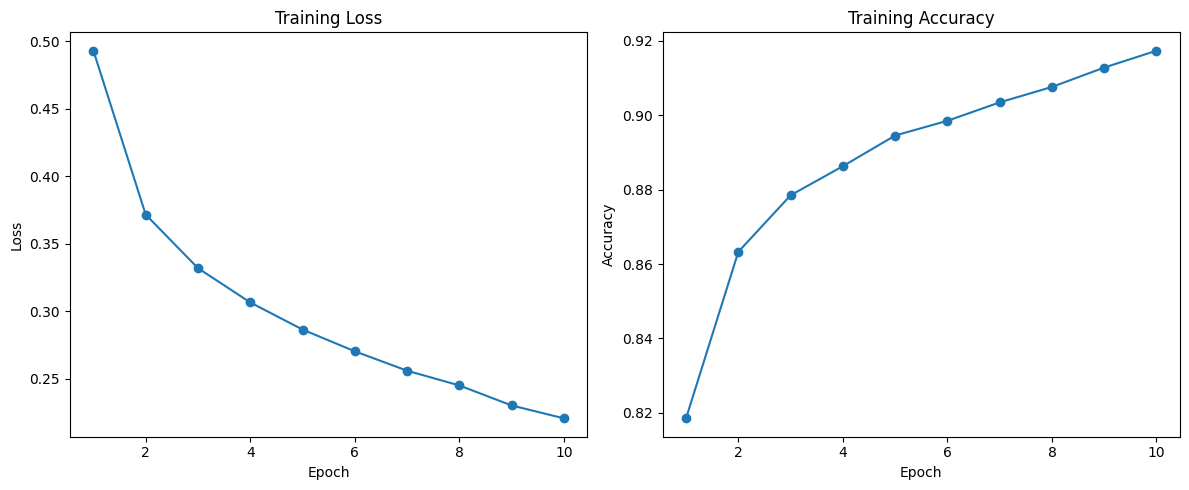


Test Accuracy: 0.8822


In [22]:
# base parameters
base_params = dict(
    hidden_sizes=[256, 128],
    dropout=0.0,
    batch_norm=False,
    lr=0.001,
    optimizer_type='Adam',
    num_epochs=10,
    batch_size=64,
    show_samples=False
)

# base model
model_base, losses_base, accs_base, test_acc_base = train_evaluate_fashion_mnist(**base_params)


Total number of parameters: 235146
Epoch [1/10] - Loss: 0.5477 - Accuracy: 0.8034
Epoch [2/10] - Loss: 0.4474 - Accuracy: 0.8416
Epoch [3/10] - Loss: 0.4294 - Accuracy: 0.8495
Epoch [4/10] - Loss: 0.4038 - Accuracy: 0.8578
Epoch [5/10] - Loss: 0.3964 - Accuracy: 0.8599
Epoch [6/10] - Loss: 0.3876 - Accuracy: 0.8611
Epoch [7/10] - Loss: 0.3841 - Accuracy: 0.8669
Epoch [8/10] - Loss: 0.3744 - Accuracy: 0.8681
Epoch [9/10] - Loss: 0.3812 - Accuracy: 0.8670
Epoch [10/10] - Loss: 0.3771 - Accuracy: 0.8686


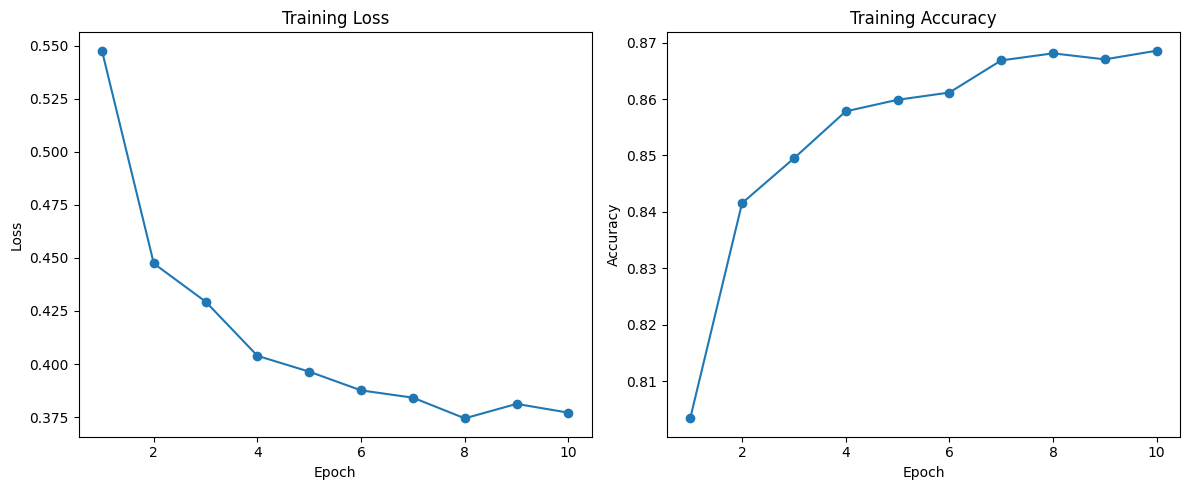


Test Accuracy: 0.8397


In [23]:
# now change learning rate
model_lr, losses_lr, accs_lr, test_acc_lr = train_evaluate_fashion_mnist(
    **{**base_params, "lr":0.01}
)

<div dir="rtl" align="right">
تغییر نرخ یادگیری (Learning Rate)

در این آزمایش ابتدا مدل با نرخ یادگیری پایه 0.001 آموزش داده شد و سپس نرخ یادگیری به 0.01 افزایش یافت.

- مشاهده شد که نرخ یادگیری بالاتر باعث شد مدل سریع‌تر وزن‌ها را تغییر دهد، 
  اما ممکن است نوسان در Loss و Accuracy در برخی Epochها ایجاد شود.
- نرخ یادگیری پایین‌تر پایدارتر است ولی ممکن است آموزش کمی کندتر باشد.
- مقایسه دقت آموزش و تست نشان می‌دهد که تغییر Learning Rate تأثیر مستقیمی بر سرعت همگرایی و پایداری مدل دارد.

</div>


Total number of parameters: 235146
Epoch [1/10] - Loss: 0.5730 - Accuracy: 0.7926
Epoch [2/10] - Loss: 0.4345 - Accuracy: 0.8426
Epoch [3/10] - Loss: 0.4006 - Accuracy: 0.8540
Epoch [4/10] - Loss: 0.3823 - Accuracy: 0.8607
Epoch [5/10] - Loss: 0.3637 - Accuracy: 0.8677
Epoch [6/10] - Loss: 0.3528 - Accuracy: 0.8709
Epoch [7/10] - Loss: 0.3402 - Accuracy: 0.8755
Epoch [8/10] - Loss: 0.3332 - Accuracy: 0.8780
Epoch [9/10] - Loss: 0.3268 - Accuracy: 0.8813
Epoch [10/10] - Loss: 0.3160 - Accuracy: 0.8850


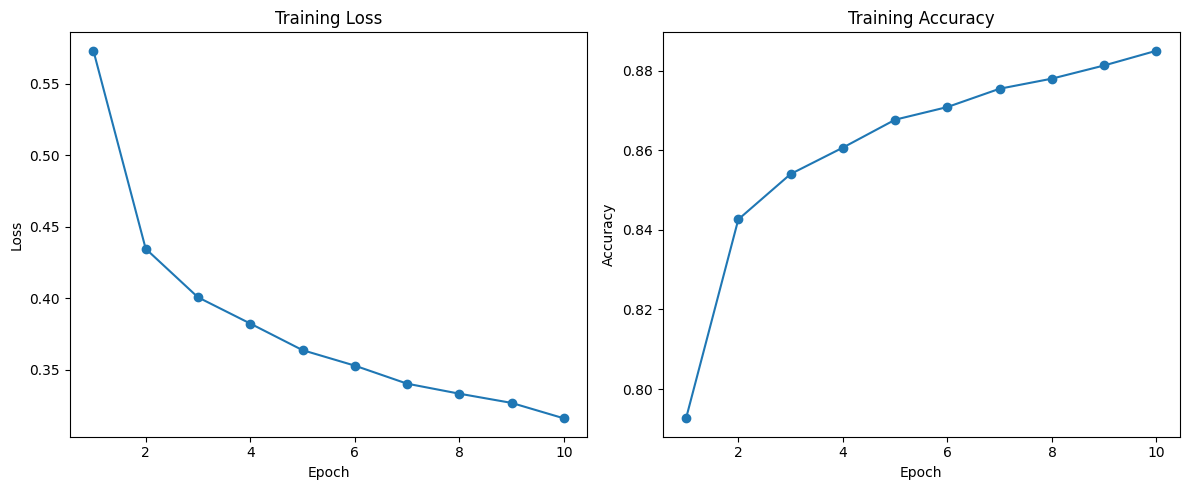


Test Accuracy: 0.8705


In [24]:
# add Dropout 0.3
model_dropout, losses_dropout, accs_dropout, test_acc_dropout = train_evaluate_fashion_mnist(
    **{**base_params, "dropout":0.3},
)


<div dir="rtl" align="right">
تأثیر Dropout

Dropout برای کاهش overfitting به مدل اضافه شد (rate=0.3).  
- مشاهده شد که نوسانات Loss کمی بیشتر شد ولی دقت تست نسبت به مدل بدون Dropout بهبود یافت.
- Dropout باعث می‌شود شبکه به جای وابستگی به نورون‌های خاص، ویژگی‌های عمومی‌تری یاد بگیرد.
- در عمل، مدل با Dropout ممکن است Accuracy آموزش کمی پایین‌تر داشته باشد ولی عملکرد تست پایدارتری ارائه می‌دهد.

</div>


Total number of parameters: 235914
Epoch [1/10] - Loss: 0.4444 - Accuracy: 0.8419
Epoch [2/10] - Loss: 0.3347 - Accuracy: 0.8772
Epoch [3/10] - Loss: 0.3003 - Accuracy: 0.8889
Epoch [4/10] - Loss: 0.2737 - Accuracy: 0.8961
Epoch [5/10] - Loss: 0.2540 - Accuracy: 0.9056
Epoch [6/10] - Loss: 0.2365 - Accuracy: 0.9112
Epoch [7/10] - Loss: 0.2204 - Accuracy: 0.9178
Epoch [8/10] - Loss: 0.2100 - Accuracy: 0.9217
Epoch [9/10] - Loss: 0.1959 - Accuracy: 0.9252
Epoch [10/10] - Loss: 0.1837 - Accuracy: 0.9310


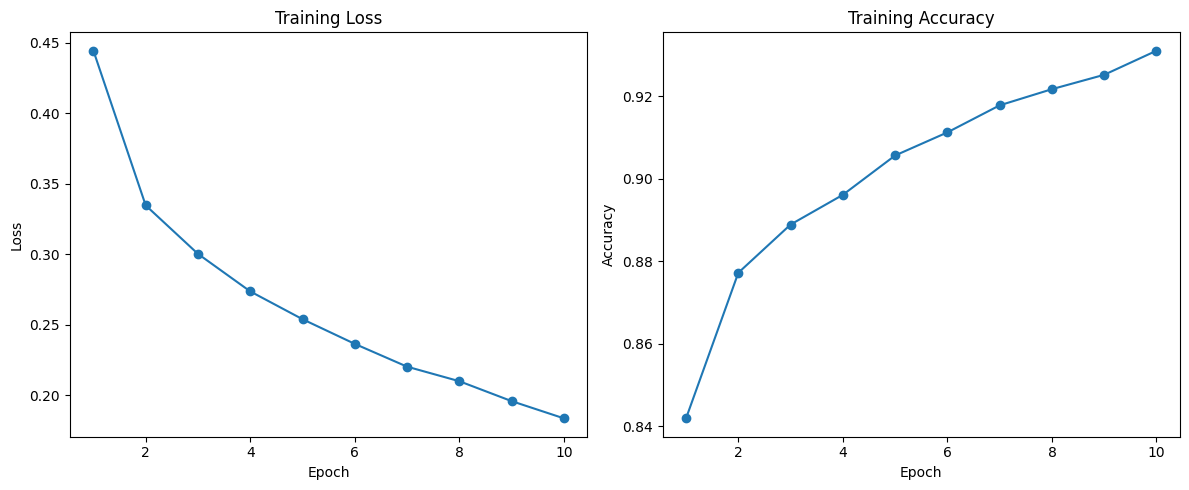


Test Accuracy: 0.8902


In [25]:
# activating BatchNorm
model_bn, losses_bn, accs_bn, test_acc_bn = train_evaluate_fashion_mnist(
    **{**base_params, "batch_norm":True}
)

<div dir="rtl" align="right">
آزمایش Batch Normalization

با فعال کردن BatchNorm، مقیاس خروجی هر لایه مخفی استاندارد شد.  
- این باعث شد مدل سریع‌تر همگرا شود و نوسانات Loss کاهش یابد.  
- BatchNorm به مدل کمک می‌کند تا یادگیری پایدارتر و قابلیت تعمیم بهتر داشته باشد.
- در این آزمایش دقت تست نسبت به مدل پایه کمی افزایش یافت.

</div>


Total number of parameters: 535818
Epoch [1/10] - Loss: 0.4852 - Accuracy: 0.8210
Epoch [2/10] - Loss: 0.3644 - Accuracy: 0.8651
Epoch [3/10] - Loss: 0.3272 - Accuracy: 0.8792
Epoch [4/10] - Loss: 0.3012 - Accuracy: 0.8882
Epoch [5/10] - Loss: 0.2775 - Accuracy: 0.8958
Epoch [6/10] - Loss: 0.2615 - Accuracy: 0.9021
Epoch [7/10] - Loss: 0.2481 - Accuracy: 0.9059
Epoch [8/10] - Loss: 0.2327 - Accuracy: 0.9121
Epoch [9/10] - Loss: 0.2215 - Accuracy: 0.9159
Epoch [10/10] - Loss: 0.2102 - Accuracy: 0.9201


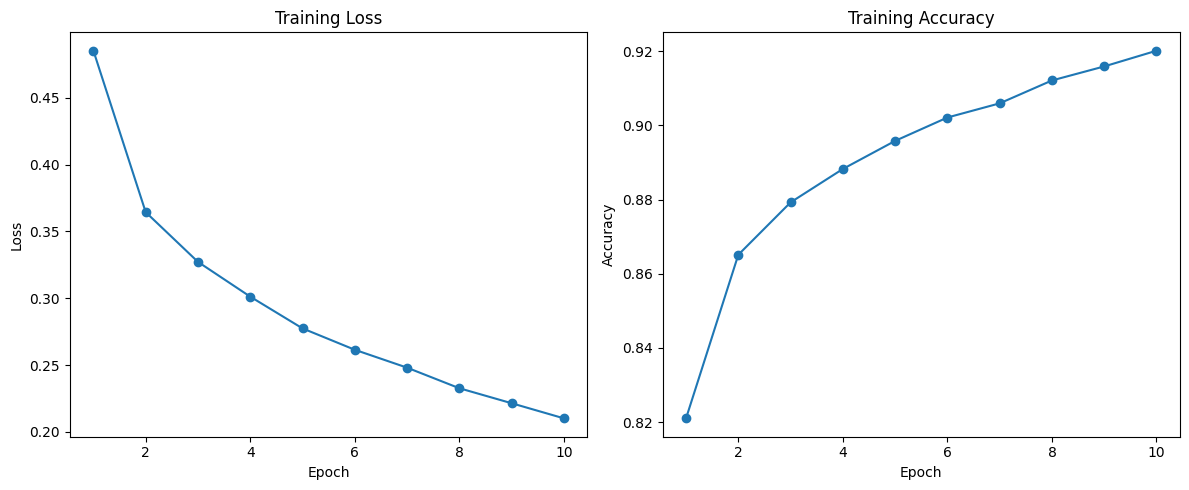


Test Accuracy: 0.8816


In [26]:
# changing the number of neurons in layers
model_hidden, losses_hidden, accs_hidden, test_acc_hidden = train_evaluate_fashion_mnist(
    **{**base_params, "hidden_sizes":[512, 256]}
)


<div dir="rtl" align="right">
افزایش تعداد نورون‌ها

تعداد نورون‌ها در لایه‌های مخفی از [256,128] به [512,256] افزایش یافت.  
- با افزایش ظرفیت شبکه، مدل توانست الگوهای پیچیده‌تر را یاد بگیرد.  
- مشاهده شد که Loss آموزش سریع‌تر کاهش پیدا کرد و Accuracy آموزش کمی افزایش یافت.
- با این حال، ظرفیت بالاتر ممکن است باعث overfitting شود اگر داده‌ها کافی نباشند.
- مقایسه Test Accuracy نشان می‌دهد که افزایش نورون‌ها می‌تواند تا حدی دقت را بهبود دهد ولی باید با Dropout و BatchNorm ترکیب شود.

</div>


Total number of parameters: 235146
Epoch [1/10] - Loss: 2.0940 - Accuracy: 0.3812
Epoch [2/10] - Loss: 1.5030 - Accuracy: 0.5929
Epoch [3/10] - Loss: 1.0822 - Accuracy: 0.7004
Epoch [4/10] - Loss: 0.8797 - Accuracy: 0.7327
Epoch [5/10] - Loss: 0.7734 - Accuracy: 0.7454
Epoch [6/10] - Loss: 0.7102 - Accuracy: 0.7544
Epoch [7/10] - Loss: 0.6687 - Accuracy: 0.7624
Epoch [8/10] - Loss: 0.6385 - Accuracy: 0.7705
Epoch [9/10] - Loss: 0.6146 - Accuracy: 0.7785
Epoch [10/10] - Loss: 0.5949 - Accuracy: 0.7855


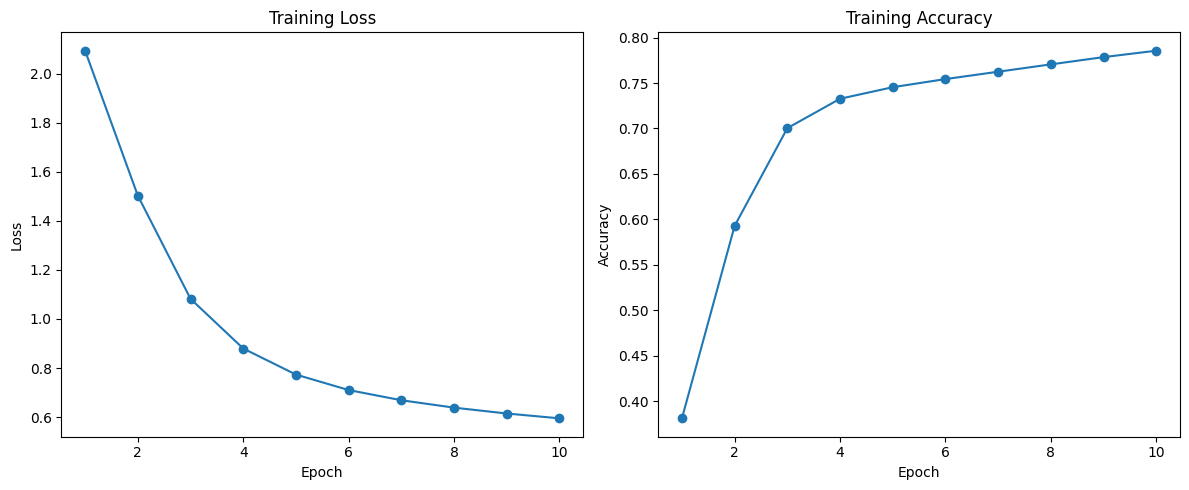


Test Accuracy: 0.7782


In [27]:
# using SGD
model_sgd, losses_sgd, accs_sgd, test_acc_sgd = train_evaluate_fashion_mnist(
    **{**base_params, "optimizer_type":"SGD"}
)

<div dir="rtl" align="right">
تغییر Optimizer

با تغییر Optimizer از Adam به SGD مشاهده شد:  
- SGD ساده‌تر و آهسته‌تر همگرا شد و نوسانات بیشتری در Loss ایجاد کرد.  
- Adam با یادگیری تطبیقی باعث شد مدل سریع‌تر همگرا شود و دقت تست بالاتری داشته باشد.
- این آزمایش نشان می‌دهد که انتخاب Optimizer و تنظیم Learning Rate می‌تواند تفاوت قابل توجهی در سرعت یادگیری و دقت نهایی مدل ایجاد کند.
</div>